## Paths

In [109]:
import os
import image_utils as iu
import numpy as np
from PIL import Image, ImageEnhance
from xml.etree.ElementTree import parse, Element, SubElement, ElementTree
import xml.etree.ElementTree as ET
import geotiff_utils as gu


In [110]:
CUSTOM_MODEL_NAME = 'my_ssd_mobnet_tuned'
PRETRAINED_MODEL_NAME = 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8'
PRETRAINED_MODEL_URL = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz'
TF_RECORD_SCRIPT_NAME = 'generate_tfrecord.py'
LABEL_MAP_NAME = 'label_map.pbtxt'

In [4]:
# CUSTOM_MODEL_NAME = 'my_efficientDet_tuned'
# PRETRAINED_MODEL_NAME = 'EfficientDet_D_896x896'
# PRETRAINED_MODEL_URL = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/efficientdet_d3_coco17_tpu-32.tar.gz'
# TF_RECORD_SCRIPT_NAME = 'generate_tfrecord.py'
# LABEL_MAP_NAME = 'label_map.pbtxt'

In [111]:
SETUP_PATH = 'Tensorflow'
WORKSPACE_PATH = os.path.join(SETUP_PATH, 'workspace')
SCRIPTS_PATH = os.path.join(SETUP_PATH, 'scripts')
API_MODEL_PATH = os.path.join(SETUP_PATH, 'models')
ANNOTATIONS_PATH = os.path.join(WORKSPACE_PATH, 'annotations')
IMAGE_PATH = os.path.join(WORKSPACE_PATH, 'images')
TRAIN_PATH = os.path.join(IMAGE_PATH, 'train')
TEST_PATH = os.path.join(IMAGE_PATH, 'test')
MODEL_PATH = os.path.join(WORKSPACE_PATH, 'models')
PRETRAINED_MODEL_PATH = os.path.join(WORKSPACE_PATH, 'pretrained-models')
# CONFIG_PATH = os.path.join(MODEL_PATH, CUSTOM_MODEL_NAME, 'pipeline.config')
CHECKPOINT_PATH = os.path.join(MODEL_PATH, CUSTOM_MODEL_NAME)
#FILES
PIPELINE_CONFIG_FILE = os.path.join(MODEL_PATH, CUSTOM_MODEL_NAME, 'pipeline.config')
SCRIPT_FILE = os.path.join(SCRIPTS_PATH, 'generate_tfrecord.py')
TRAIN_RECORD_FILE = os.path.join(ANNOTATIONS_PATH, 'train.record')
TEST_RECORD_FILE = os.path.join(ANNOTATIONS_PATH, 'test.record')
LABEL_MAP_FILE = os.path.join(ANNOTATIONS_PATH, 'label_map.pbtxt')
# TF_RECORD_SCRIPT_FILE: os.path.join(SCRIPTS_PATH, TF_RECORD_SCRIPT_NAME)
# LABELMAP_FILE: os.path.join(ANNOTATION_PATH, LABEL_MAP_NAME)


In [112]:
#Create directories
iu.create_dir_if_not_exists(SETUP_PATH)
iu.create_dir_if_not_exists(WORKSPACE_PATH)
iu.create_dir_if_not_exists(SCRIPTS_PATH)
iu.create_dir_if_not_exists(API_MODEL_PATH)
iu.create_dir_if_not_exists(ANNOTATIONS_PATH)
iu.create_dir_if_not_exists(IMAGE_PATH)
iu.create_dir_if_not_exists(MODEL_PATH)
iu.create_dir_if_not_exists(PRETRAINED_MODEL_PATH)
# iu.create_dir_if_not_exists(CONFIG_PATH)
iu.create_dir_if_not_exists(CHECKPOINT_PATH)

Creating label map

## Create TF records

## Download TF Models Pretrained Models from TS Model Zoo

In [8]:
!cd TensorFlow && git clone https://github.com/tensorflow/models

Cloning into 'models'...
remote: Enumerating objects: 78197, done.
remote: Total 78197 (delta 0), reused 0 (delta 0), pack-reused 78197
Receiving objects: 100% (78197/78197), 593.49 MiB | 341.00 KiB/s, done.
Resolving deltas: 100% (55620/55620), done.
Updating files: 100% (3199/3199), done.


In [201]:
!cp -r pycocotools TensorFlow/models/research/

cp: pycocotools: No such file or directory


In [6]:
!cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && cp object_detection/packages/tf2/setup.py . && python -m pip install .

zsh:1: command not found: protoc


In [ ]:
if os.name == 'posix':
    !brew install install protobuf-compiler
    !cd Tensorflow/models/research & & protoc object_detection/protos/*.proto - -python_out = . & & cp object_detection/packages/tf2/setup.py . & & python - m pip install .

if os.name == 'nt':
    url = "https://github.com/protocolbuffers/protobuf/releases/download/v3.15.6/protoc-3.15.6-win64.zip"
    wget.download(url)
    !move protoc-3.15.6-win64.zip {paths['PROTOC_PATH']}
    !cd {paths['PROTOC_PATH']} & & tar - xf protoc-3.15.6-win64.zip
    os.environ['PATH'] += os.pathsep + \
        os.path.abspath(os.path.join(paths['PROTOC_PATH'], 'bin'))
    !cd Tensorflow/models/research & & protoc object_detection/protos/*.proto - -python_out = . & & copy object_detection\\packages\\tf2\\setup.py setup.py & & python setup.py build & & python setup.py install
    !cd Tensorflow/models/research/slim & & pip install - e .


In [52]:
VERIFICATION_SCRIPT = os.path.join(
    API_MODEL_PATH, 'research', 'object_detection', 'builders', 'model_builder_tf2_test.py')
# Verify Installation
!python {VERIFICATION_SCRIPT}


Running tests under Python 3.8.13: /Users/ernestopoku-kwarteng/Documents/Pycharm Projects/Anaconda/Machine-Learning/ml-env/bin/python
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_deepmac
2022-10-31 13:32:31.185098: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/ernestopoku-kwarteng/Documents/Pycharm Projects/Anaconda/Machine-Learning/ml-env/lib/python3.8/site-packages/object_detection/builders/model_builder.py:1100: DeprecationWarning: The 'warn' function is deprecated, use 'warning' instead
  logging.warn(('Building experimental DeepMAC meta-arch.'
W1031 13:32:31.387104 4508882432 model_builder.py:1100] Building experimental DeepMAC meta-arch. Some features may be omitted.
INFO:tensorflow:time(__main__.Mo

In [215]:
!pip uninstall protobuf matplotlib -y
!pip install protobuf matplotlib == 3.2


Found existing installation: protobuf 3.19.4
Uninstalling protobuf-3.19.4:
  Successfully uninstalled protobuf-3.19.4
Found existing installation: matplotlib 3.5.1
Uninstalling matplotlib-3.5.1:
  Successfully uninstalled matplotlib-3.5.1
zsh:1: = not found


In [8]:
import object_detection


In [216]:
if os.name == 'posix':
    !wget {PRETRAINED_MODEL_URL}
    !mv {PRETRAINED_MODEL_NAME+'.tar.gz'} {PRETRAINED_MODEL_PATH'}
    !cd {PRETRAINED_MODEL_PATH} && tar - zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}
if os.name == 'nt':
    wget.download(PRETRAINED_MODEL_URL)
    !move {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} & & tar - zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}


--2022-10-31 11:04:04--  http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 216.58.215.176
Connecting to download.tensorflow.org (download.tensorflow.org)|216.58.215.176|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20515344 (20M) [application/x-tar]
Saving to: ‘ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz’

ssd_mobilenet_v2_fp 100%[===================>]  19.56M  4.40MB/s    in 4.9s    

2022-10-31 11:04:09 (3.96 MB/s) - ‘ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz’ saved [20515344/20515344]

zsh:1: unmatched '
tar: Must specify one of -c, -r, -t, -u, -x


# 2. Create Label Map

In [113]:
labels = [{'name': 'Plantain', 'id': 1}]
labels


[{'name': 'Plantain', 'id': 1}]

In [114]:
from absl import flags
import tensorflow.compat.v2 as tf


In [115]:
with open(os.path.join(ANNOTATIONS_PATH, 'label_map.pbtxt'), 'w') as f:
    for label in labels:
        f.write('item{\n')
        f.write('\tname:\'{}\'\n'.format(label['name']))
        f.write('\tid:{}\n'.format(label['id']))
        f.write('}\n')


In [220]:
!pip install wheel


## Create TF records

In [45]:
if not os.path.exists(SCRIPT_FILE):
    !git clone https: // github.com/nicknochnack/GenerateTFRecord {SCRIPTS_PATH}


In [116]:
!python {SCRIPT_FILE} -x {TRAIN_PATH} -l {LABEL_MAP_FILE} -o {TRAIN_RECORD_FILE}
!python {SCRIPT_FILE} -x {TEST_PATH} -l {LABEL_MAP_FILE} -o {TEST_RECORD_FILE}

Successfully created the TFRecord file: Tensorflow/workspace/annotations/train.record
Successfully created the TFRecord file: Tensorflow/workspace/annotations/test.record


# 4. Copy Model Config to Training Folder

In [117]:
if os.name == 'posix':
    pa = os.path.join(PRETRAINED_MODEL_PATH,
                      PRETRAINED_MODEL_NAME, 'pipeline.config')
    !cp {pa} {CHECKPOINT_PATH}
if os.name == 'nt':
    !copy {os.path.join(PRETARINED_MODEL_PATH, PRETRAINED_MODEL_NAME, 'pipeline.config')} {CHECKPOINT_PATH}


# 5. Update Config For Transfer Learning

In [118]:
import tensorflow as tf
from object_detection.utils import config_util
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format


In [119]:
config = config_util.get_configs_from_pipeline_file(PIPELINE_CONFIG_FILE)

In [120]:
config

{'model': ssd {
   num_classes: 90
   image_resizer {
     fixed_shape_resizer {
       height: 320
       width: 320
     }
   }
   feature_extractor {
     type: "ssd_mobilenet_v2_fpn_keras"
     depth_multiplier: 1.0
     min_depth: 16
     conv_hyperparams {
       regularizer {
         l2_regularizer {
           weight: 3.9999998989515007e-05
         }
       }
       initializer {
         random_normal_initializer {
           mean: 0.0
           stddev: 0.009999999776482582
         }
       }
       activation: RELU_6
       batch_norm {
         decay: 0.996999979019165
         scale: true
         epsilon: 0.0010000000474974513
       }
     }
     use_depthwise: true
     override_base_feature_extractor_hyperparams: true
     fpn {
       min_level: 3
       max_level: 7
       additional_layer_depth: 128
     }
   }
   box_coder {
     faster_rcnn_box_coder {
       y_scale: 10.0
       x_scale: 10.0
       height_scale: 5.0
       width_scale: 5.0
     }
   }
   matc

In [121]:
pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()
with tf.io.gfile.GFile(PIPELINE_CONFIG_FILE, "r") as f:
    proto_str = f.read()
    text_format.Merge(proto_str, pipeline_config)

In [122]:
pipeline_config.model.ssd.num_classes = len(labels)
pipeline_config.train_config.batch_size = 4
pipeline_config.train_config.fine_tune_checkpoint = os.path.join(PRETRAINED_MODEL_PATH, PRETRAINED_MODEL_NAME, 'checkpoint', 'ckpt-0')
pipeline_config.train_config.fine_tune_checkpoint_type = "detection"
pipeline_config.train_input_reader.label_map_path = LABEL_MAP_FILE
pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = [TRAIN_RECORD_FILE]
pipeline_config.eval_input_reader[0].label_map_path = LABEL_MAP_FILE
pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = [TEST_RECORD_FILE]


In [123]:
config_text = text_format.MessageToString(pipeline_config)
with tf.io.gfile.GFile(PIPELINE_CONFIG_FILE, "wb") as f:
    f.write(config_text)

# 6. Train the model

In [124]:
TRAINING_SCRIPT = os.path.join(API_MODEL_PATH, 'research', 'object_detection', 'model_main_tf2.py')


In [125]:
command = "python {} --model_dir={} --pipeline_config_path={} --num_train_steps=60000".format(TRAINING_SCRIPT, CHECKPOINT_PATH, PIPELINE_CONFIG_FILE)
print(command)

python Tensorflow/models/research/object_detection/model_main_tf2.py --model_dir=Tensorflow/workspace/models/my_ssd_mobnet_tuned --pipeline_config_path=Tensorflow/workspace/models/my_ssd_mobnet_tuned/pipeline.config --num_train_steps=60000


In [127]:
!{command}

2023-03-08 00:22:26.687736: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
W0308 00:22:26.689670 4378375680 cross_device_ops.py:1387] There are non-GPU devices in `tf.distribute.Strategy`, not using nccl allreduce.
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)
I0308 00:22:26.707356 4378375680 mirrored_strategy.py:369] Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)
INFO:tensorflow:Maybe overwriting train_steps: 60000
I0308 00:22:26.723149 4378375680 config_util.py:552] Maybe overwriting train_steps: 60000
INFO:tensorflow:Maybe overwriting use_bfloat16: False
I0308 00:22:26.723347 4378375680 config_util.py:552] Maybe overwriting use

In [ ]:
!python Tensorflow/models/research/object_detection/model_main_tf2.py - -model_dir = Tensorflow/workspace/models/my_ssd_mobnet_tuned - -pipeline_config_path = Tensorflow/workspace/models/my_ssd_mobnet_tuned/pipeline.config - -num_train_steps = 50000


# Evaluate the model

In [192]:
command = "python {} --model_dir={} --pipeline_config_path={} --checkpoint_dir={}".format(TRAINING_SCRIPT, CHECKPOINT_PATH, PIPELINE_CONFIG_FILE, CHECKPOINT_PATH)
print(command)

python Tensorflow/models/research/object_detection/model_main_tf2.py --model_dir=Tensorflow/workspace/models/my_ssd_mobnet_tuned --pipeline_config_path=Tensorflow/workspace/models/my_ssd_mobnet_tuned/pipeline.config --checkpoint_dir=Tensorflow/workspace/models/my_ssd_mobnet_tuned


In [193]:
!{command}

W0308 16:03:20.245166 4618745344 model_lib_v2.py:1081] Forced number of epochs for all eval validations to be 1.
INFO:tensorflow:Maybe overwriting sample_1_of_n_eval_examples: None
I0308 16:03:20.245442 4618745344 config_util.py:552] Maybe overwriting sample_1_of_n_eval_examples: None
INFO:tensorflow:Maybe overwriting use_bfloat16: False
I0308 16:03:20.245573 4618745344 config_util.py:552] Maybe overwriting use_bfloat16: False
INFO:tensorflow:Maybe overwriting eval_num_epochs: 1
I0308 16:03:20.245696 4618745344 config_util.py:552] Maybe overwriting eval_num_epochs: 1
W0308 16:03:20.245871 4618745344 model_lib_v2.py:1099] Expected number of evaluation epochs is 1, but instead encountered `eval_on_train_input_config.num_epochs` = 0. Overwriting `num_epochs` to 1.
2023-03-08 16:03:20.253393: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical 

# 8. Load Train Model From Checkpoint

In [7]:
import os
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
from object_detection.utils import config_util

In [155]:
# Load pipeline config and build a detection model
configs = config_util.get_configs_from_pipeline_file(PIPELINE_CONFIG_FILE)
detection_model = model_builder.build(
    model_config=configs['model'], is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(CHECKPOINT_PATH, 'ckpt-8')).expect_partial()


@tf.function
def detect_fne(image):
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections


In [152]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline


In [137]:
category_index = label_map_util.create_category_index_from_labelmap(
    LABEL_MAP_FILE)

In [132]:
category_index


{1: {'id': 1, 'name': 'Plantain'}}

In [ ]:
img = iu.read_image(IMAGE_PATH)
image_np = np.array(img)

input_tensor = tf.convert_to_tensor(
    np.expand_dims(image_np, 0), dtype=tf.float32)
detections = detect_fne(input_tensor)

num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(
    np.int64)

label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
    image_np_with_detections,
    detections['detection_boxes'],
    detections['detection_classes']+label_id_offset,
    detections['detection_scores'],
    category_index,
    use_normalized_coordinates=True,
    max_boxes_to_draw=15,
    min_score_thresh=.1,
    agnostic_mode=False)

plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()


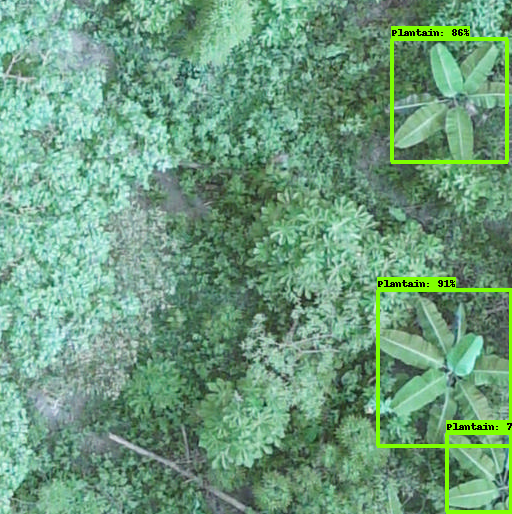

In [160]:
Image.fromarray(image_np_with_detections)


In [106]:
class_dict[detections['detection_classes']+label_id_offset]

TypeError: unhashable type: 'numpy.ndarray'

In [14]:
def get_detections(detections, class_dict ,min_score_tresh):
    d_boxes = detections['detection_boxes']
    d_scores = detections['detection_scores']
    d_classes = detections['detection_classes']+label_id_offset
    class_names = [class_dict[x] for x in d_classes]
    detection_list = []
    for d_box, d_score, class_name in zip(d_boxes, d_scores, class_names):
        if d_score > min_score_tresh:    
           ymin, xmin, ymax, xmax = d_box[0], d_box[1], d_box[2], d_box[3]
           bbox = [xmin, ymin, xmax, ymax]
           detection_list.append((np.array(bbox), d_score, class_name))
    return detection_list


In [15]:
sd = get_detections(detections, {1: 'plantain'}, 0.4)

In [16]:
sd

[(array([0.09228727, 0.51026297, 0.32365236, 0.85932076], dtype=float32),
  0.91837955,
  'plantain'),
 (array([0.17923607, 0.00852421, 0.43935853, 0.3640072 ], dtype=float32),
  0.8231714,
  'plantain'),
 (array([0.5977012 , 0.19148505, 0.6970751 , 0.3166725 ], dtype=float32),
  0.7655597,
  'plantain'),
 (array([0.03624092, 0.26988354, 0.3859356 , 0.59981763], dtype=float32),
  0.6423676,
  'plantain'),
 (array([0.       , 0.5985954, 0.0766801, 0.81278  ], dtype=float32),
  0.48496258,
  'plantain'),
 (array([0.06366289, 0.31454033, 0.3408876 , 0.6726658 ], dtype=float32),
  0.41991127,
  'plantain')]

In [218]:
import object_detection_utils as odu
rects = []
for bboxInfo in sd:
    r = bboxInfo[0] * 512
    r = [int(x) for x in r]
    rects.append(r)

In [219]:
rects

[[47, 261, 165, 439],
 [91, 4, 224, 186],
 [306, 98, 356, 162],
 [18, 138, 197, 307],
 [0, 306, 39, 416],
 [32, 161, 174, 344]]

In [117]:
import shapefile

# Create a new shapefile with the type 'POLYGON'
sf = shapefile.Writer('bounding_boxes', shapeType=shapefile.POLYGON)

# Add the fields for the bounding box coordinates, confidence score, and class name
sf.field('xmin', 'N', decimal=10)
sf.field('ymin', 'N', decimal=10)
sf.field('xmax', 'N', decimal=10)
sf.field('ymax', 'N', decimal=10)
sf.field('confidence', 'N', decimal=10)
sf.field('class', 'C', size=50)

# Get the bounding box array, confidence score, and class name from the tuple
bounding_box_arr, confidence_score, class_name = sd[0]

# Create a polygon from the bounding box coordinates
xmin, ymin, xmax, ymax = bounding_box_arr
polygon = [[(xmin, ymin), (xmin, ymax), (xmax, ymax),
            (xmax, ymin), (xmin, ymin)]]

# Add the polygon and attribute data to the shapefile
sf.poly(polygon)
sf.record(xmin, ymin, xmax, ymax, confidence_score, class_name)

# Save the shapefile
sf.close()


In [116]:
!pip install pyshp


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 195.6 kB/s eta 0:00:00a 0:00:01

[notice] A new release of pip available: 22.3 -> 23.0.1
[notice] To update, run: pip install --upgrade pip


In [ ]:
len(detections['detection_boxes'])
detections['detection_scores']
# detections['detection_classes']+label_id_offset


In [83]:
Image.fromarray(image_np_with_detections).save('plantain4.png')


# Predictions

In [179]:
def split_image(image, row_count, col_count, new_part_size):
    # parts = []
    width, height = image.size
    left = 0
    top = 0
    right = width / col_count
    bottom = height / row_count
    rows = []
    for r in range(row_count):
        row = []
        top = int(r * (height / row_count))
        bottom = int(top + (height / row_count))
        for c in range(col_count):
            left = int(c * (width / col_count))
            right = int(left + (width / col_count))
            part = image.crop((left, top, right, bottom))
            # part = part.resize(new_part_size)
            # parts.append(part)
            row.append(part)
        rows.append(row)
    return rows

def split_image_into_rows(image, max_divided_image_size):
    max_d_width, max_d_height = max_divided_image_size
    image_width, image_height = image.size
    row_count, col_count = int(
        image_height / max_d_height), int(image_width / max_d_width)
    rows = split_image(image, row_count, col_count, max_divided_image_size)
    return rows


def combine_predictions(rows, color_space='RGB'):
    part_width, part_height = rows[0][0].size
    full_image_width, full_image_height = (
        len(rows[0]) * part_width, len(rows) * part_height)
    empty_img = np.zeros([full_image_height, full_image_width], dtype=np.uint8)
    empty_img = Image.fromarray(empty_img).convert(color_space)
    for x in range(len(rows)):
        row = rows[x]
        for i in range(len(row)):
            image_part = row[i]
            empty_img.paste(image_part, (i * part_width, x * part_height))
    return empty_img


In [180]:
def crop_geoTiff(geoTiff, left, top, right, bottom, dtype='uint16'):
    gt_width, gt_height = geoTiff.RasterXSize, geoTiff.RasterYSize
    if right > gt_width:
        right = gt_width
    if bottom > gt_height:
        bottom = gt_height
    width = abs(right - left)
    height = abs(top - bottom)
    bands = []
    for x in range(geoTiff.RasterCount):
        band = geoTiff.GetRasterBand(x + 1).ReadAsArray(left, top,
                                                        int(width), int(height))
        bands.append(band)
    output = np.zeros(
        (int(height), int(width), geoTiff.RasterCount), dtype)
    for x in range(len(bands)):
        output[..., x] = bands[x]
    return output


In [181]:

def predict_image(image):
    image_np = np.asarray(image)

    input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
    detections = detect_fne(input_tensor)
    
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
    detections['num_detections'] = num_detections

# detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    label_id_offset = 1
    image_np_with_detections = image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
      image_np_with_detections,
      detections['detection_boxes'],
      detections['detection_classes']+label_id_offset,
      detections['detection_scores'],
      category_index,
      use_normalized_coordinates=True,
      max_boxes_to_draw=5,
      min_score_thresh=.1,
      agnostic_mode=False)
    return Image.fromarray(image_np_with_detections)


def predict_np_image(np_image):
    image_np = np_image
    input_tensor = tf.convert_to_tensor(
        np.expand_dims(image_np, 0), dtype=tf.float32)
    detections = detect_fne(input_tensor)

    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                  for key, value in detections.items()}
    detections['num_detections'] = num_detections

# detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(
        np.int64)

    label_id_offset = 1
    image_np_with_detections = image_np.copy()
    print(detections)
    viz_utils.visualize_boxes_and_labels_on_image_array(
        image_np_with_detections,
        detections['detection_boxes'],
        detections['detection_classes']+label_id_offset,
        detections['detection_scores'],
        category_index,
        use_normalized_coordinates=True,
        max_boxes_to_draw=20,
        min_score_thresh=.4,
        agnostic_mode=False)
    return image_np_with_detections


def predict_bounding_box(np_image):
    image_np = np_image
    input_tensor = tf.convert_to_tensor(
        np.expand_dims(image_np, 0), dtype=tf.float32)
    detections = detect_fne(input_tensor)

    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                  for key, value in detections.items()}
    detections['num_detections'] = num_detections

# detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(
        np.int64)
    return detections
    
    
    
def predict_image_parts(rows, image_size):
    new_rows = []
    for row in rows:
        new_row = []
        for image in row:
            new_image = predict_image(image)
            new_row.append(new_image)
        # image.save('data/segmentation/' + str(uuid4()) + '.png')
        new_rows.append(new_row)
    return new_rows


In [182]:
from osgeo import gdal, ogr
from osgeo import gdal_array
from osgeo import osr

real_image = gdal.Open('data/Orthomosaic.rgb.tif')


In [49]:


# Define the output file name and dimensions
output_file = "data/plantain.tif"
width = real_image.RasterXSize
height = real_image.RasterYSize
bands = 3
# Create the GeoTIFF file with the specified dimensions
driver = gdal.GetDriverByName("GTiff")
ds = driver.Create(output_file, width, height, bands,
                   gdal.GDT_Byte, options=["COMPRESS=LZW"])
# Define the projection of the file

ds.SetProjection(real_image.GetProjection())
ds.SetGeoTransform(
    real_image.GetGeoTransform())  # Specify its coordinates


0

In [183]:
def write_progress_to_file(filename, progress):
    with open(filename, 'w+') as f:
        f.write(f"{progress[0]},{progress[1]}")


def read_progress_from_file(filename):
    try:
        with open(filename, 'r') as f:
             contents = f.read().strip().split(',')
             progress = (int(contents[0]), int(contents[1]))
    except:
        progress = (0, 0)
    return progress


In [185]:
def write_to_shape_file(path, gt,detections, ):
    # open the existing shapefile in "update" mode
    with shapefile.Writer(path) as w:
        # add a new field to the shapefile
        w.field("new_field", "C", "50")
        # add a new point feature to the shapefile
        w.point(1, 2)

       # add attributes to the new feature
       w.record("new_attribute_value")

       # add a new polygon feature to the shapefile
      w.poly(parts=[[[1, 2], [3, 4], [5, 6]]])

       # add attributes to the new feature
      w.record("new_attribute_value_2")


IndentationError: unindent does not match any outer indentation level (<tokenize>, line 10)

In [186]:
import shapefile

# create a new shapefile
shp = shapefile.Writer('data/shp/output4')

# # add a shape to the shapefile
# shp.poly(parts=[[[0, 0], [0, 1], [1, 1], [1, 0], [0, 0]]])

# set the projection of the shapefile to WGS 84 / UTM zone 30N
prj_file = open("data/shp/output4.prj", "w")
epsg_code = 'PROJCS["WGS 84 / UTM zone 30N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-3],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]'
prj_file.write(epsg_code)
prj_file.close()
# add fields to the shapefile
shp.field("class_name", "C", 50)
shp.field("confidence", "N", decimal=2)
xmin_i, xres_i, xskew_i, ymin_i, yskew_r, yres_i = real_image.GetGeoTransform()
xres_i = abs(xres_i)
yres_i = abs(yres_i)


In [191]:
# set the projection of the shapefile to WGS 84 / UTM zone 30N
prj_file = open("data/shp/output4.prj", "w")
epsg_code = 'PROJCS["WGS 84 / UTM zone 30N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-3],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]'
prj_file.write(epsg_code)
prj_file.close()


In [187]:
def update_shp_data(shp, sd, coord, xres_i, yres_i):
    lat,  lng = coord
    for bbox, confidence, class_name in sd:
        bbox = np.array(bbox * 512, dtype='float')
        xmin, ymin, xmax, ymax = bbox
        xmin = lng + (xmin * xres_i)
        xmax = lng + (xmax * xres_i)
        ymin = lat + (ymin * yres_i)
        ymax = lat + (ymax * yres_i)
        # add the first bounding box as a feature
        bounding_box_arr1 = [(xmin, ymin), (xmax, ymin),
                             (xmax, ymax), (xmin, ymax), (xmin, ymin)]
        shp.poly([bounding_box_arr1])
        shp.record(class_name, confidence)


In [108]:
# save the shapefile
shp = None


In [189]:
image_size = (512, 512)
rows = split_image_into_rows(real_image, image_size)
# print('split done')
# rows = predict_flat_image_parts(mc_unet, rows, image_size)
print('pred done')

Progress: [################################################# ] 100.0%pred done


In [190]:
# save the shapefile
shp = None


In [ ]:
ds = None

In [101]:
import numpy as np
from osgeo import gdal, ogr

# Define the geotiff file parameters
nrows, ncols = 4096, 4096
geotransform = [0, 1, 0, 0, 0, -1]
srs = ogr.osr.SpatialReference()
srs.ImportFromEPSG(4326)

# Create the geotiff file
driver = gdal.GetDriverByName('GTiff')
options = ['BIGTIFF=YES']
ds = driver.Create('example.tif', ncols, nrows, 1,
                   gdal.GDT_Byte, options=options)
ds.SetGeoTransform(geotransform)
ds.SetProjection(srs.ExportToWkt())

# Define the bounding box parameters
boxes = [(500, 500, 600, 600, 'plantain', 0.9),
         (2000, 2000, 2100, 2100, 'coconut', 0.8),
         (3500, 3500, 3600, 3600, 'orange', 0.7)]

# Add the bounding boxes to the shapefile
# Add the bounding boxes to the shapefile
if os.path.exists('example.shp'):
    driver = ogr.GetDriverByName('ESRI Shapefile')
    w = driver.Open('example.shp', 1)
    if w is None:
        print('Could not open existing shapefile')
        exit()
else:
    driver = ogr.GetDriverByName('ESRI Shapefile')
    w = driver.CreateDataSource('example.shp')
    if w is None:
        print('Could not create shapefile')
        exit()
lyr = w.CreateLayer('boxes', srs)
lyr.CreateField(ogr.FieldDefn('class', ogr.OFTString))
lyr.CreateField(ogr.FieldDefn('score', ogr.OFTReal))
for box in boxes:
    x1, y1, x2, y2, class_label, score = box
    # Convert the coordinates to pixel coordinates
    px1 = int((x1 - geotransform[0]) / geotransform[1])
    py1 = int((y1 - geotransform[3]) / geotransform[5])
    px2 = int((x2 - geotransform[0]) / geotransform[1])
    py2 = int((y2 - geotransform[3]) / geotransform[5])
    # Create the geometry and feature
    ring = ogr.Geometry(ogr.wkbLinearRing)
    ring.AddPoint(x1, y1)
    ring.AddPoint(x2, y1)
    ring.AddPoint(x2, y2)
    ring.AddPoint(x1, y2)
    ring.AddPoint(x1, y1)
    poly = ogr.Geometry(ogr.wkbPolygon)
    poly.AddGeometry(ring)
    feat = ogr.Feature(lyr.GetLayerDefn())
    feat.SetGeometry(poly)
    feat.SetField('class', class_label)
    feat.SetField('score', score)
    lyr.CreateFeature(feat)
    # Fill in the bounding box in the geotiff file
    data = np.zeros((py2-py1, px2-px1), dtype=np.uint8)
    ds.GetRasterBand(1).WriteArray(data, px1, py1)

# Clean up
del ds, w


ValueError: negative dimensions are not allowed

In [20]:
geotiff_file = "path/to/geotiff.tif"
ds = real_image
srs = osr.SpatialReference()
srs.ImportFromWkt(ds.GetProjection())


0

In [27]:
shapefile_name = "data/shp/output.shp"
driver = ogr.GetDriverByName("ESRI Shapefile")
ds_out = driver.CreateDataSource(shapefile_name)
layer = ds_out.CreateLayer("object_detection", srs, ogr.wkbPolygon)
layer.CreateField(ogr.FieldDefn("confidence", ogr.OFTReal))
layer.CreateField(ogr.FieldDefn("class", ogr.OFTString))


0

In [28]:
for bbox, confidence, class_name in sd:
    bbox = np.array(bbox * 512, dtype='float')
    xmin, ymin, xmax, ymax = bbox
    ymin = 0 - ymin
    ymax = 0 - ymax
    ring = ogr.Geometry(ogr.wkbLinearRing)
    ring.AddPoint_2D(xmin, ymin) #xmin, ymin
    ring.AddPoint_2D(xmin, ymax) #xmin, ymax
    ring.AddPoint_2D(xmax, ymax) #xmax, ymax
    ring.AddPoint_2D(xmax, ymin)
    ring.AddPoint_2D(xmin, ymin)
    poly = ogr.Geometry(ogr.wkbPolygon)
    poly.AddGeometry(ring)
    feature = ogr.Feature(layer.GetLayerDefn())
    feature.SetGeometry(poly)
    feature.SetField("confidence", float(confidence))
    feature.SetField("class", class_name)
    layer.CreateFeature(feature)
    feature = None


In [38]:
import shapefile

# open the existing shapefile in write mode
with shapefile.Writer("data/shp/output2.shp", shapeType=shapefile.POLYGON) as shp:
    # set the projection of the shapefile to WGS 84 / UTM zone 30N
    prj_file = open("data/shp/output2.prj", "w")
    epsg_code = 'PROJCS["WGS 84 / UTM zone 30N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-3],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]'
    prj_file.write(epsg_code)
    prj_file.close()
    # add fields to the shapefile
    shp.field("class_name", "C", 50)
    shp.field("confidence", "N", decimal=2)
    xmin_i, xres_i, xskew_i, ymin_i, yskew_r, yres_i = real_image.GetGeoTransform()
    xres_i = abs(xres_i)
    yres_i = abs(yres_i)
    for bbox, confidence, class_name in sd:
        bbox = np.array(bbox * 512, dtype='float')
        xmin, ymin, xmax, ymax = bbox
        xmin = xmin_i + (xmin * xres_i)
        xmax = xmin_i + (xmax * xres_i)
        ymin = ymin_i - (ymin * yres_i)
        ymax = ymin_i - (ymax * yres_i)
        # add the first bounding box as a feature
        bounding_box_arr1 = [(xmin, ymin), (xmax, ymin), (xmax, ymax), (xmin, ymax), (xmin, ymin)]
        shp.poly([bounding_box_arr1])
        shp.record(class_name, confidence)


In [242]:
import object_detection_utils as odu
rects = []
for bboxInfo in sd:
    r = bboxInfo[0] * 512
    r = [int(x) for x in r]
    rects.append(odu.get_rect(r))
# r =odu.get_rect(sd[0][0] * 512)
# r = [int(x) for x in r]


In [238]:
rects

[(24, 417, 133, 80),
 (133, 280, 115, 101),
 (372, 459, 61, 47),
 (357, 172, 73, 52)]

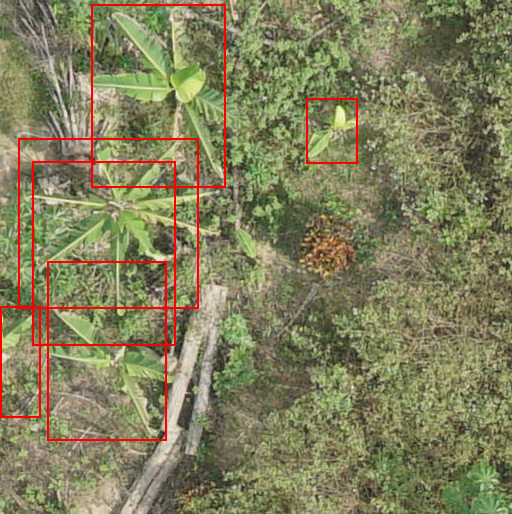

In [243]:
im = iu.read_image(IMAGE_PATH)
odu.plot_rect(im, rects, (255, 0, 0), 2)

In [29]:
ds_out = None
ds = None